In [15]:
import sys
sys.path.append("/datashare/MLCourse/Course_Materials") # Preferentially import from the datashare.
sys.path.append("../") # Otherwise, import from the local folder's parent folder, where your stuff lives.

import numpy as np
import time
import matplotlib.pyplot as plt
import torch, torch.nn as nn
import torchvision, torchvision.transforms as tt
from torch.multiprocessing import Manager
torch.multiprocessing.set_sharing_strategy("file_system")
from utility import utils as uu
from utility.plotImageModel import *
import pandas as pd
import os
from pathlib import Path
from os.path import exists
import seaborn as sns
import torchvision.transforms.functional as ttf

from utility.utils_2 import *

In [16]:
data_augments = None

In [17]:
cur_path = Path("plots_and_graphs.ipynb")
parent_dir = cur_path.parent.absolute()
masterThesis_folder = str(parent_dir.parent.absolute())+'/'
data_dir = masterThesis_folder+"data/Clean_LiTS/"

cache_me = False
if cache_me is True:
    cache_mgr = Manager()
    cache_mgr.data = cache_mgr.dict()
    cache_mgr.cached = cache_mgr.dict()
    for k in ["train", "val", "test"]:
        cache_mgr.data[k] = cache_mgr.dict()
        cache_mgr.cached[k] = False
# function from utils, credit: Institute for Artificial Intelligence in Medicine. url: https://mml.ikim.nrw/
# dataset outputs a tensor image (dimensions [1,256,256]) and a tensor target (0, 1 or 2)

ds = uu.LiTS_Classification_Dataset(
    data_dir=data_dir,
    transforms=data_augments,
    verbose=True,
    cache_data=cache_me,
    cache_mgr=(cache_mgr if cache_me is True else None),
    debug=True,
)

  0%|          | 0/2 [00:00<?, ?it/s]

  0%|          | 0/3 [00:00<?, ?it/s]

  0%|          | 0/3038 [00:00<?, ?it/s]

  0%|          | 0/2 [00:00<?, ?it/s]

  0%|          | 0/3039 [00:00<?, ?it/s]

  0%|          | 0/3038 [00:00<?, ?it/s]

Dataset initialization complete.


-------

In [18]:
cur_path = Path("plots_and_graphs.ipynb")
parent_dir = cur_path.parent.absolute()
masterThesis_folder = str(parent_dir.parent.absolute()) + '/'

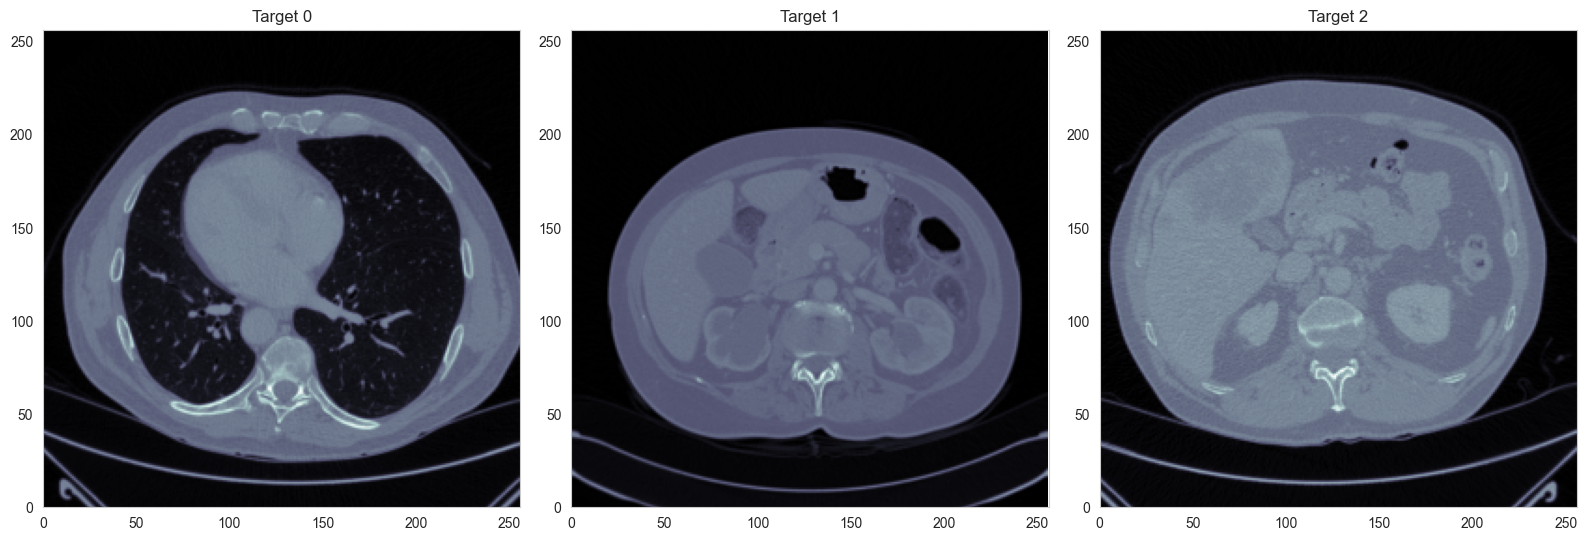

In [19]:
ds.set_mode('test')
plt.figure(figsize=(16, 9))

img0, target0 = ds.__getitem__(650)
img0 = img0.to('cpu')
array_image_0 = uu.convert_tensor_to_opencv_array(img0)
plt.subplot(1, 3, 1)
plt.imshow(array_image_0, cmap='bone')
plt.grid(False)
plt.xlim((0, 256))
plt.ylim((0, 256))
plt.title(f"Target {target0}")

img1, target1 = ds.__getitem__(782)
img1 = img1.to('cpu')
array_image_1 = uu.convert_tensor_to_opencv_array(ttf.hflip(img1))
plt.subplot(1, 3, 2)
plt.grid(False)
plt.imshow(array_image_1, cmap="bone")
plt.xlim((0, 256))
plt.ylim((0, 256))
plt.title(f"Target {target1}")


ds.set_mode('test')
img2, target2 = ds.__getitem__(421)
img2 = img2.to('cpu')
array_image_2 = uu.convert_tensor_to_opencv_array(ttf.hflip(img2))
plt.subplot(1, 3, 3)
plt.imshow(array_image_2, cmap="bone")
plt.grid(False)
plt.xlim((0, 256))
plt.ylim((0, 256))
plt.title(f"Target {target2}")
plt.tight_layout()
plt.savefig(fname = masterThesis_folder+'images/image_example_classification.png',bbox_inches='tight')
plt.show()


In [20]:
cur_path = Path("plots_and_graphs.ipynb")
parent_dir = cur_path.parent.absolute()
masterThesis_folder = str(parent_dir.parent.absolute())+'/'
data_dir = masterThesis_folder+"data/Clean_LiTS/"

data_augments = None
ds = uu.LiTS_Segmentation_Dataset(
    data_dir = data_dir,
    transforms = data_augments,
    verbose = True,
    cache_data = cache_me,
    cache_mgr = (cache_mgr if cache_me is True else None),
    debug = True,
)


  0%|          | 0/2 [00:00<?, ?it/s]

  0%|          | 0/3 [00:00<?, ?it/s]

  0%|          | 0/3038 [00:00<?, ?it/s]

Dataset initialization complete.


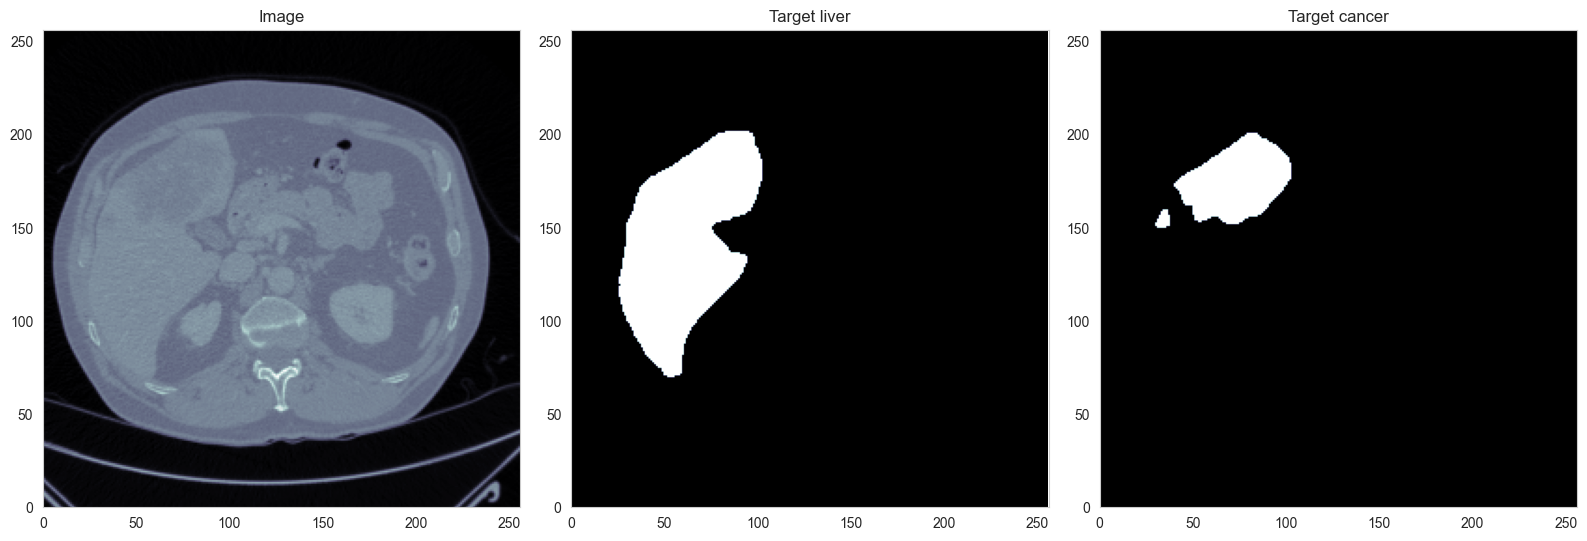

In [21]:
ds.set_mode('test')
img,targets = ds.__getitem__(421)
plt.figure(figsize=(16, 9))
img = img.to('cpu')

array_image_0 = uu.convert_tensor_to_opencv_array(ttf.hflip(img))
plt.subplot(1, 3, 1)
plt.imshow(array_image_0, cmap='bone')
plt.grid(False)
plt.xlim((0, 256))
plt.ylim((0, 256))
plt.title("Image")

array_image_1 = uu.convert_tensor_to_opencv_array(ttf.hflip(targets[0]))
plt.subplot(1, 3, 2)
plt.imshow(array_image_1, cmap="bone")
plt.grid(False)
plt.xlim((0, 256))
plt.ylim((0, 256))
plt.title("Target liver")


array_image_2 = uu.convert_tensor_to_opencv_array(ttf.hflip(targets[1]))
plt.subplot(1, 3, 3)
plt.imshow(array_image_2, cmap="bone")
plt.grid(False)
plt.xlim((0, 256))
plt.ylim((0, 256))
plt.title("Target cancer")
plt.tight_layout()
plt.savefig(fname = masterThesis_folder+'images/image_example_segmentation.png',bbox_inches='tight')
plt.show()


-----